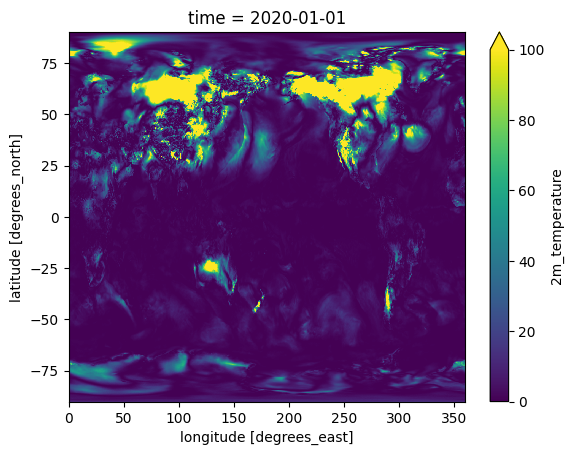

In [2]:
# Requires "zarr" and "gcsfs" packages to be installed
# !pip install zarr gcsfs

from scores.continuous import mse
import xarray as xr
import pandas as pd

era5 = xr.open_zarr("gs://weatherbench2/datasets/era5-forecasts/2020-1440x721.zarr")
graphcast = xr.open_zarr(
    "gs://weatherbench2/datasets/graphcast/2020/date_range_2019-11-16_2021-02-01_12_hours_derived.zarr"
)

fcst = graphcast["2m_temperature"].sel(
    time="2020-01-01T00:00:00", prediction_timedelta=pd.Timedelta("5 days")
)

obs = era5["2m_temperature"].sel(
    time="2020-01-01T00:00:00", prediction_timedelta=pd.Timedelta("0 days")
)
fcst = fcst.compute()
obs = obs.compute()
obs = obs.rename({"latitude": "lat", "longitude": "lon"})
result = mse(fcst, obs, preserve_dims="all")
result.plot(vmax=100)

